## Multiple Linear Regression With scikit-learn
- Regression is a statistical method for determining the relationship between features and an outcome variable or result. Machine learning, it's utilized as a method for predictive modeling, in which an algorithm is employed to forecast continuous outcomes. Multiple linear regression, often known as multiple regression, is a statistical method that predicts the result of a response variable by combining numerous explanatory variables. Multiple regression is a variant of linear regression (ordinary least squares)  in which just one explanatory variable is used.m


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing



In [5]:
df = pd.read_csv("data/Real_estate.csv")
df.drop('No', inplace=True, axis=1)

print(df.head())
print(df.columns)

   X1 transaction date  X2 house age  ...  X6 longitude  Y house price of unit area
0             2012.917          32.0  ...     121.54024                        37.9
1             2012.917          19.5  ...     121.53951                        42.2
2             2013.583          13.3  ...     121.54391                        47.3
3             2013.500          13.3  ...     121.54391                        54.8
4             2012.833           5.0  ...     121.54245                        43.1

[5 rows x 7 columns]
Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

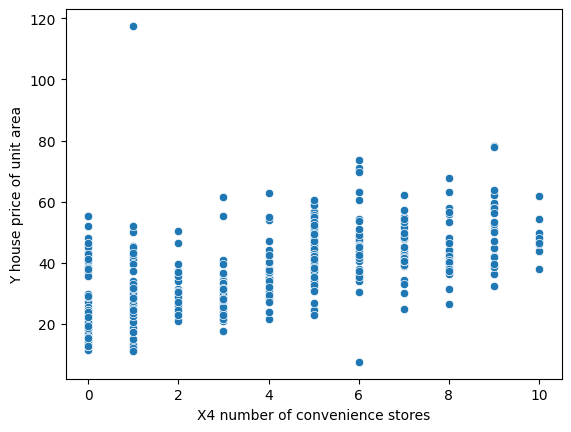

In [10]:
sns.scatterplot(x='X4 number of convenience stores',
                y='Y house price of unit area', data=df)

In [15]:
X = df.drop('Y house price of unit area', axis=1)
print(X.columns)
y = df['Y house price of unit area']
print(y)

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')
0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


In [16]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [19]:
# creating a regression model
model = LinearRegression()

In [20]:
# fitting the model
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
# making predictions
predictions = model.predict(X_test)

In [22]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  46.211797834927665
mean_absolute_error :  5.392293684755756


- MAE: A metric that tells us the mean absolute difference between the predicted values and the actual values in a dataset. The lower the MAE, the better a model fits a dataset.

    - MAE = 1/n * Σ|yi – ŷi|

- RMSE: A metric that tells us the square root of the average squared difference between the predicted values and the actual values in a dataset. The lower the RMSE, the better a model fits a dataset.


    - RMSE = √Σ(yi – ŷi)2 / n

- RMSE squares the errors, which means it gives disproportionately higher weight to larger errors. This makes RMSE highly sensitive to outliers. In multimodal data, where multiple peaks or clusters exist, outliers are more likely to occur. Using RMSE in such cases can skew the error metric, making it less representative of the overall model performance.

- MAE, on the other hand, calculates the absolute differences between predicted and actual values. It treats all errors equally, regardless of their magnitude. This makes MAE more robust to outliers, providing a more balanced view of model performance across all data points.